# Compute the bayesian upper limit for a Poisson near the physical boundary

In [4]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from math import exp
%matplotlib inline

confidenceinterval = 0.95
beta  = 1 - confidenceinterval

# parameters
nobs = 6
vb = 3

max_obs = 20 # range to compute the Poisson distribution
k = np.arange(0, max_obs, 1)

def numerator(nobs, vs_up, vb):
    N = poisson.pmf(k, vs_up + vb)
    sum = 0
    for i in range(nobs+1): # range stops at nobs -1
        sum+=N[i]
    return sum

def denominator(vb):
    N = poisson.pmf(k, vb)
    sum = 0
    for i in range(nobs+1): # range stops at nobs -1
        sum+=N[i]
    return sum

# Compute upper boundary
vs_up = 0
s = 0
scan_step = 0.01
ck = True
while (vs_up < 2000) and (ck):
    vs_up = s * scan_step
    # print ("\nSignal = ", Signal)

    ratio = numerator(nobs, vs_up, vb)/denominator(vb)
    if (ratio < beta):
        ck = False
        # print (Signal, sum)
    s+=1

print ("95% CL Upper limit on Nobs = ", nobs, " with an expected background vb = ",vb, "\nvs_up = ", vs_up)

95% CL Upper limit on Nobs =  6  with an expected background vb =  3 
vs_up =  8.91


95% CL Upper limit on Nobs =  6
vb = 0.00  vs_up = 11.90
vb = 1.00  vs_up = 10.90
vb = 2.00  vs_up = 9.90
vb = 3.00  vs_up = 9.00
vb = 4.00  vs_up = 8.10
vb = 5.00  vs_up = 7.40
vb = 6.00  vs_up = 6.80
vb = 7.00  vs_up = 6.30
vb = 8.00  vs_up = 5.90
vb = 9.00  vs_up = 5.60
vb = 10.00  vs_up = 5.30
vb = 11.00  vs_up = 5.10
vb = 12.00  vs_up = 4.90


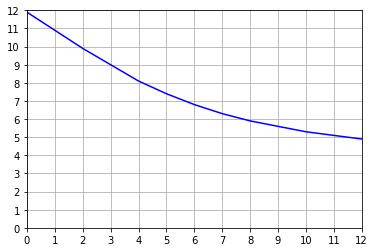

In [19]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from math import exp
%matplotlib inline

confidenceinterval = 0.95
beta  = 1 - confidenceinterval

# parameters
nobs = 6
vb_min = 0
vb_max = 12

max_obs = 20 # range to compute the Poisson distribution
k = np.arange(0, max_obs, 1)

def numerator(nobs, vs_up, vb):
    N = poisson.pmf(k, vs_up + vb)
    sum = 0
    for i in range(nobs+1): # range stops at nobs -1
        sum+=N[i]
    return sum

def denominator(vb):
    N = poisson.pmf(k, vb)
    sum = 0
    for i in range(nobs+1): # range stops at nobs -1
        sum+=N[i]
    return sum

# Compute upper boundaries

v_vs_up = []
v_vb    = []

print ("95% CL Upper limit on Nobs = ", nobs)

nsteps = 12
scan_step = 0.1
for i in range(nsteps+1):    
    vb = vb_min + i/nsteps*(vb_max-vb_min)
    
    vs_up = 0
    s=0
    ck = True
    while (vs_up < 2000) and (ck):
        vs_up = s * scan_step
        ratio = numerator(nobs, vs_up, vb)/denominator(vb)
        if (ratio < beta):
            ck = False
        s+=1
    print ("vb = {:.2f}".format(vb), " vs_up = {:.2f}".format(vs_up))
    v_vs_up.append(vs_up)
    v_vb.append(vb)

plt.plot(v_vb, v_vs_up, 'b-')
plt.axis([0,12,0,12])
plt.xticks(np.arange(0, 13, 1.0))
plt.yticks(np.arange(0, 13, 1.0))

plt.grid()
plt.show()

